In [1]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.16-2~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,688 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd6

In [2]:
!git clone https://github.com/tensorflow/models.git
!pip install -q contextlib2
!pip install -q pycocotools

Cloning into 'models'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 30627 (delta 0), reused 5 (delta 0), pack-reused 30622
Receiving objects: 100% (30627/30627), 510.52 MiB | 36.01 MiB/s, done.
Resolving deltas: 100% (19239/19239), done.
Checking out files: 100% (3079/3079), done.


In [3]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python object_detection/builders/model_builder_test.py

/content/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.8: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_without_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rc

In [0]:
!mkdir /content/number_plate_detection/
!mv /content/label_map.pbtxt /content/number_plate_detection/
!mv /content/generate_tfrecord.py /content/number_plate_detection/
!mv /content/train_labels.csv /content/number_plate_detection/
!mv /content/test_labels.csv /content/number_plate_detection/
!mv /content/pipeline.config /content/number_plate_detection/

In [0]:
 !mkdir /content/number_plate_detection/data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
%cd /content
!cp drive/My\ Drive/number_plates.zip .

/content


In [11]:
!unzip /content/number_plates.zip
!mv /content/number_plates /content/number_plate_detection/data/

Archive:  /content/number_plates.zip
   creating: number_plates/
  inflating: number_plates/AYO9034.jpg  
  inflating: number_plates/AYO9034.txt  
  inflating: number_plates/AZJ6991.jpg  
  inflating: number_plates/AZJ6991.txt  
  inflating: number_plates/FZB9581.jpg  
  inflating: number_plates/FZB9581.txt  
  inflating: number_plates/GWT2180.jpg  
  inflating: number_plates/GWT2180.txt  
  inflating: number_plates/HPM9362.jpg  
  inflating: number_plates/HPM9362.txt  
  inflating: number_plates/JGZ3298.jpg  
  inflating: number_plates/JGZ3298.txt  
  inflating: number_plates/JIT7463.jpg  
  inflating: number_plates/JIT7463.txt  
  inflating: number_plates/JIY4434.jpg  
  inflating: number_plates/JIY4434.txt  
  inflating: number_plates/JOG9221.jpg  
  inflating: number_plates/JOG9221.txt  
  inflating: number_plates/JPQ9870.jpg  
  inflating: number_plates/JPQ9870.txt  
  inflating: number_plates/JQS5683.jpg  
  inflating: number_plates/JQS5683.txt  
  inflating: number_plates/JQV552

In [12]:
%cd /content/number_plate_detection
!python generate_tfrecord.py --csv_input=train_labels.csv --output_path=train.record --img_path=data/number_plates --label_map=label_map.pbtxt
!python generate_tfrecord.py --csv_input=test_labels.csv --output_path=test.record --img_path=data/number_plates --label_map=label_map.pbtxt

/content/number_plate_detection


W0912 18:27:48.870653 140683984037760 deprecation_wrapper.py:119] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0912 18:27:48.882396 140683984037760 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:137: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/number_plate_detection/train.record


W0912 18:27:53.731520 140206071961472 deprecation_wrapper.py:119] From generate_tfrecord.py:107: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0912 18:27:53.740809 140206071961472 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/label_map_util.py:137: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/number_plate_d

In [0]:
test_record_fname = '/content/number_plate_detection/test.record'
train_record_fname = '/content/number_plate_detection/train.record'
label_map_pbtxt_fname = '/content/number_plate_detection/label_map.pbtxt'

In [14]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

--2019-09-12 18:28:02--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.127.128, 2a00:1450:4013:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.127.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   221MB/s    in 0.8s    

2019-09-12 18:28:03 (221 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz’ saved [187925923/187925923]



In [15]:
!tar -xzvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

ssd_mobilenet_v2_coco_2018_03_29/checkpoint
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.meta
ssd_mobilenet_v2_coco_2018_03_29/pipeline.config
ssd_mobilenet_v2_coco_2018_03_29/saved_model/saved_model.pb
ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb
ssd_mobilenet_v2_coco_2018_03_29/saved_model/
ssd_mobilenet_v2_coco_2018_03_29/saved_model/variables/
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.index
ssd_mobilenet_v2_coco_2018_03_29/
ssd_mobilenet_v2_coco_2018_03_29/model.ckpt.data-00000-of-00001


In [16]:
fine_tune_checkpoint = "/content/number_plate_detection/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt"
fine_tune_checkpoint

'/content/number_plate_detection/ssd_mobilenet_v2_coco_2018_03_29/model.ckpt'

In [17]:
%cd /content
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

/content
--2019-09-12 18:28:12--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.86.119.192, 52.204.38.150, 52.22.145.207, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.86.119.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  12.98M  14.0MB/s    in 0.9s    

2019-09-12 18:28:14 (14.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
!cp -r drive/My\ Drive/training_logs .
!cp -r drive/My\ Drive/trained_model .

In [0]:
# !mkdir training_logs
get_ipython().system_raw(
    'tensorboard --logdir training_logs --host 0.0.0.0 --port 6006 &'
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://3acebd76.ngrok.io


In [22]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path=number_plate_detection/pipeline.config \
    --model_dir=training_logs/ \
    --alsologtostderr \
    --num_train_steps=11000 \
    --num_eval_steps=50

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W0912 18:35:08.504001 140454593087360 deprecation_wrapper.py:119] From /content/models/research/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0912 18:35:08.507376 140454593087360 deprecation_wrapper.py:119] From /content/models/research/object_detection/model_lib.py:616: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0912 18:35:08.507504 140454593087360 model_lib.py:617] Forced number of epochs for all eval validations to be 1.

W0912 18:35:08.507598 140454593087360 deprecation_wrapper.py:119] From /con

In [0]:
!cp -r training_logs/ drive/My\ Drive/

In [0]:
!mkdir trained_model

In [27]:
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=number_plate_detection/pipeline.config \
    --output_directory=trained_model \
    --trained_checkpoint_prefix=training_logs/model.ckpt-11000





W0912 18:58:37.349338 140480530102144 deprecation_wrapper.py:119] From /content/models/research/object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0912 18:58:37.354846 140480530102144 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:381: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0912 18:58:37.355204 140480530102144 deprecation_wrapper.py:119] From /content/models/research/object_detection/exporter.py:113: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0912 18:58:37.392540 140480530102144 deprecation_wrapper.py:119] From /content/models/research/object_detection/core/preprocessor.py:2660: The name tf.image.resize_images is deprecated. Please use tf.image.resize instead.


W0912 18:58:37.419147 140480530102144 deprecation_wrapper.py:119] From /content/models/research/object_detection/meta

In [0]:
# !zip -r trained_model.zip trained_model/
!cp -r /content/trained_model/ /content/drive/My\ Drive/

In [29]:
!wget https://github.com/opencv/opencv/raw/master/samples/dnn/tf_text_graph_ssd.py
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/tf_text_graph_common.py

--2019-09-12 19:01:41--  https://github.com/opencv/opencv/raw/master/samples/dnn/tf_text_graph_ssd.py
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/tf_text_graph_ssd.py [following]
--2019-09-12 19:01:41--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/tf_text_graph_ssd.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16436 (16K) [text/plain]
Saving to: ‘tf_text_graph_ssd.py’

tf_text_graph_ssd.p 100%[===================>]  16.05K  --.-KB/s    in 0.004s  

2019-09-12 19:01:42 (4.35 MB/s) - ‘tf_text_graph_ssd.py’ saved [16436/16436]

--2019-09-1

In [31]:
!python3 tf_text_graph_ssd.py --input trained_model/frozen_inference_graph.pb --config trained_model/pipeline.config --output trained_model/graph.pbtxt

Scale: [0.200000-0.950000]
Aspect ratios: [1.0, 2.0, 0.5, 3.0, 0.33329999446868896]
Reduce boxes in the lowest layer: True
Number of classes: 1
Number of layers: 6
box predictor: convolutional
Input image size: 300x300
Instructions for updating:
Use tf.gfile.GFile.

2019-09-12 19:04:31.718721: I tensorflow/tools/graph_transforms/transform_graph.cc:317] Applying sort_by_execution_order



In [35]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = "/content/trained_model/frozen_inference_graph.pb"

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = "/content/number_plate_detection/label_map.pbtxt"

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  "/content/number_plate_detection/data/number_plates"

# assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.jpg"))[-8:]
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/number_plate_detection/data/number_plates/wts-lg-000133.jpg', '/content/number_plate_detection/data/number_plates/car14.jpg', '/content/number_plate_detection/data/number_plates/test_037.jpg', '/content/number_plate_detection/data/number_plates/wts-lg-000029.jpg', '/content/number_plate_detection/data/number_plates/wts-lg-000078.jpg', '/content/number_plate_detection/data/number_plates/test_025.jpg', '/content/number_plate_detection/data/number_plates/f0a3b8c0-198a-471b-9ca9-345c3dd28073.jpg', '/content/number_plate_detection/data/number_plates/car6.jpg']


/content/models/research/object_detection


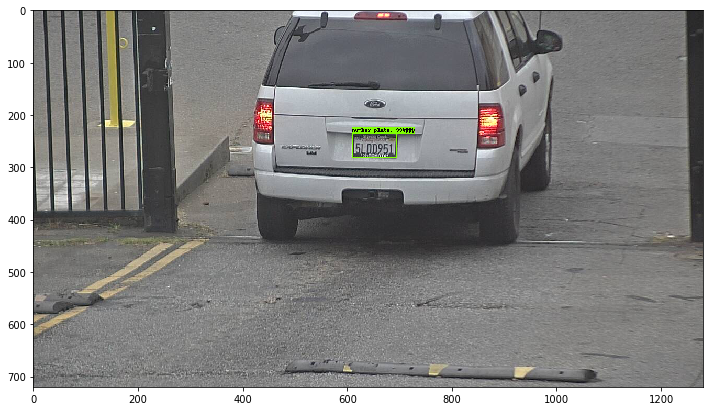

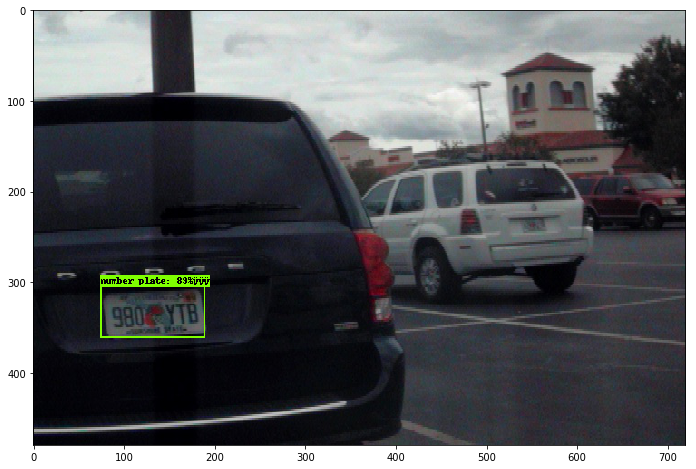

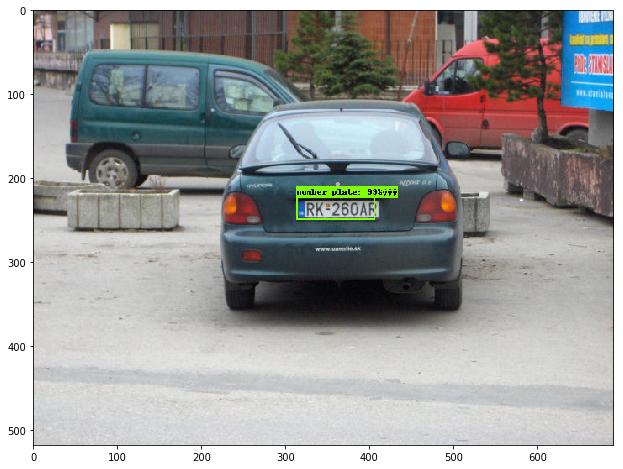

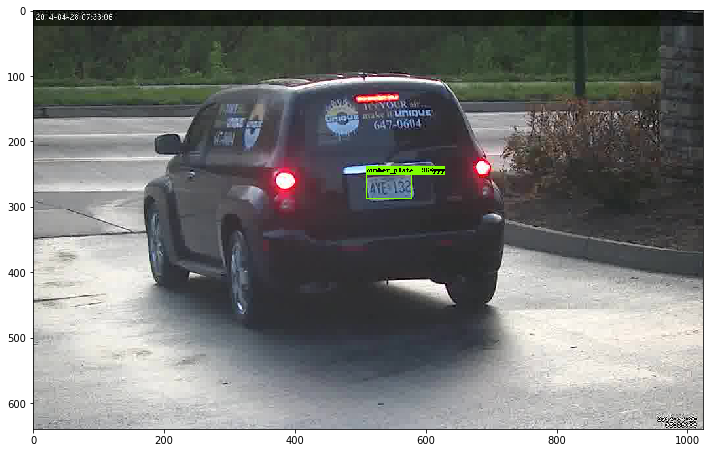

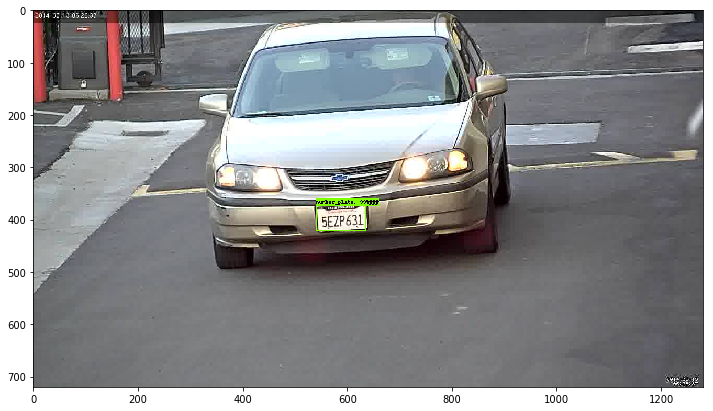

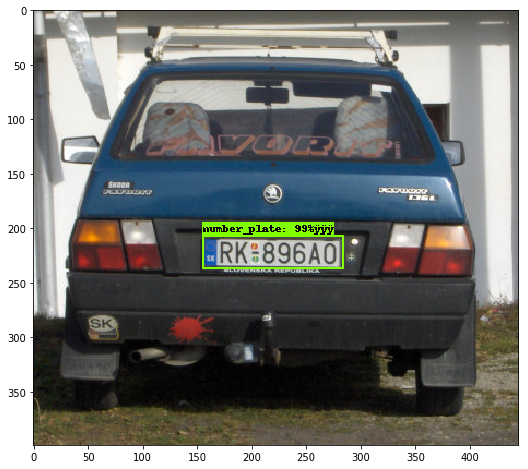

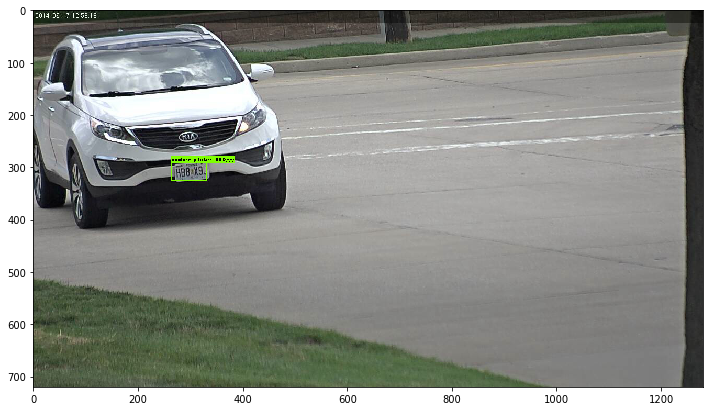

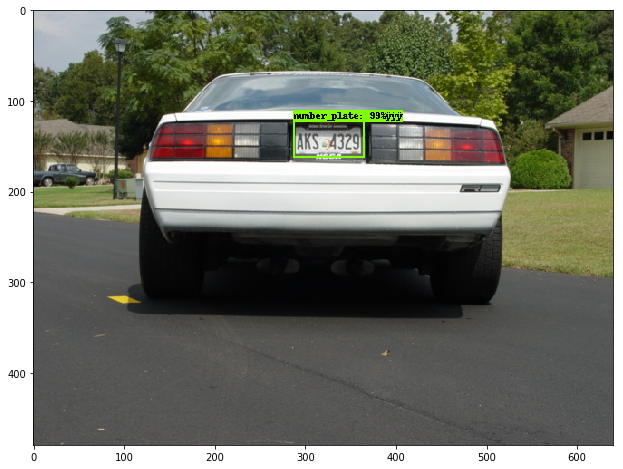

In [36]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

num_classes=1

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=2)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)